Notebook  to explore ICC ratings, which could explain the low ICC observed using the contrast maps

In [1]:
ratings_data = pd.read_csv("../data/pip_emoreg_ratings_raw.csv")

demo_data = pd.read_csv("../data/Thomas_Javi_ML_Share_PIP_Reappraisal_IMT_Longitudinal_02_NOV_2020.csv")
subject_fullsample =  demo_data.iloc[:,2].to_numpy()
print("Subjects used = %d" % len(subject_fullsample))

ratings_data_full = ratings_data[ratings_data.ID.isin(subject_fullsample)]
print(len(ratings_data_full.ID.unique()))

subjects_preds = pd.read_csv("../data/final_subjects_used.txt", header=None).iloc[:,0].to_list()
print("Subjects used for prediction = %d" % len(subjects_preds))

ratings_data_preds = ratings_data[ratings_data.ID.isin(subjects_preds)]
print(len(ratings_data_preds.ID.unique()))

Subjects used = 176
176
Subjects used for prediction = 145
145


In [2]:
# Split-half: first half with the first 23 trial, second half with the remaining 22
ratings_data_full.loc[:, 'half'] = ratings_data_full.Trial.apply(lambda x: "First" if x <= 23 else "Second")
ratings_data_preds.loc[:, 'half'] = ratings_data_preds.Trial.apply(lambda x: "First" if x <= 23 else "Second")

/home/javi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [3]:
ratings_data_full = ratings_data_full[ratings_data_full.PicValence=="negative"]
ratings_data_preds = ratings_data_preds[ratings_data_preds.PicValence=="negative"]

In [4]:
ratings_data_full_group = ratings_data_full.groupby(by=["ID", "half", "Procedure"]).mean()
ratings_data_full_group.reset_index(inplace=True)

ratings_data_preds_group = ratings_data_preds.groupby(by=["ID", "half", "Procedure"]).mean()
ratings_data_preds_group.reset_index(inplace=True)

In [5]:
# Subject 6444 was actually not rating most of the task
ratings_data_full[ratings_data_full.ID==6444]

,ID,Trial,PicValence,Procedure,IAPS,Rating_RESP,Rating_RT,half
3870,6444,1,negative,WatchProc,3350.bmp,NaN,NaN,First
3871,6444,2,negative,RegulateProc,9250.bmp,2.0,1555.0,First
3872,6444,3,negative,WatchProc,3120.bmp,4.0,1803.0,First
3874,6444,5,negative,RegulateProc,9420.bmp,5.0,971.0,First
3875,6444,6,negative,RegulateProc,3230.bmp,2.0,881.0,First
3877,6444,8,negative,WatchProc,9414.bmp,3.0,1382.0,First
3878,6444,9,negative,WatchProc,3051.bmp,3.0,2241.0,First
3880,6444,11,negative,WatchProc,3550.bmp,1.0,2488.0,First
3882,6444,13,negative,WatchProc,2053.bmp,1.0,460.0,First
3883,6444,14,negative,WatchProc,3500.bmp,3.0,1676.0,First


In [6]:
ratings_data_full_group[ratings_data_full_group.Rating_RESP.isna()]

,ID,half,Procedure,Trial,Rating_RESP,Rating_RT
326,6444,Second,RegulateProc,33.888889,NaN,NaN
327,6444,Second,WatchProc,33.000000,NaN,NaN


In [7]:
plt.rcParams['legend.fontsize']=12
plt.rcParams['legend.title_fontsize']=15

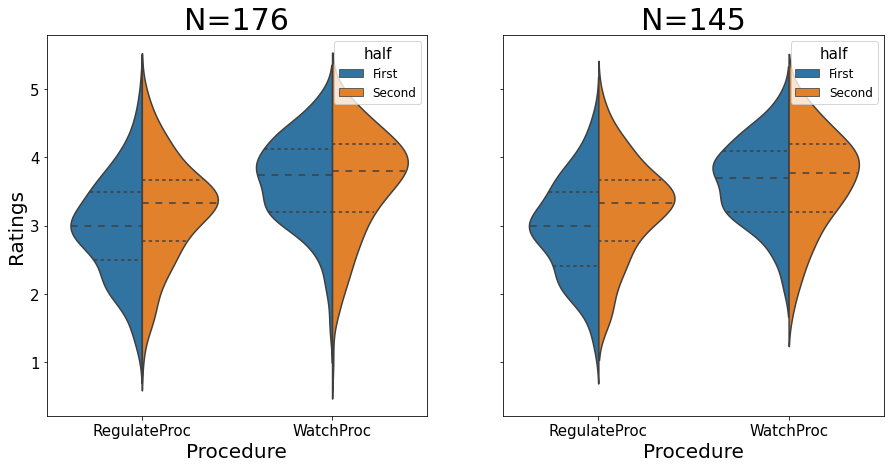

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7), sharey=True)

sns.violinplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_full_group, split=True,  inner="quart", ax=axs[0])

sns.violinplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_preds_group, split=True,  inner="quart", ax=axs[1])

axs[0].set_ylabel("Ratings", size=20)
axs[1].set_ylabel("")
axs[0].set_xlabel("Procedure", size=20)
axs[1].set_xlabel("Procedure", size=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)
axs[0].set_title("N=176", size=30)
axs[1].set_title("N=145", size=30)
pass

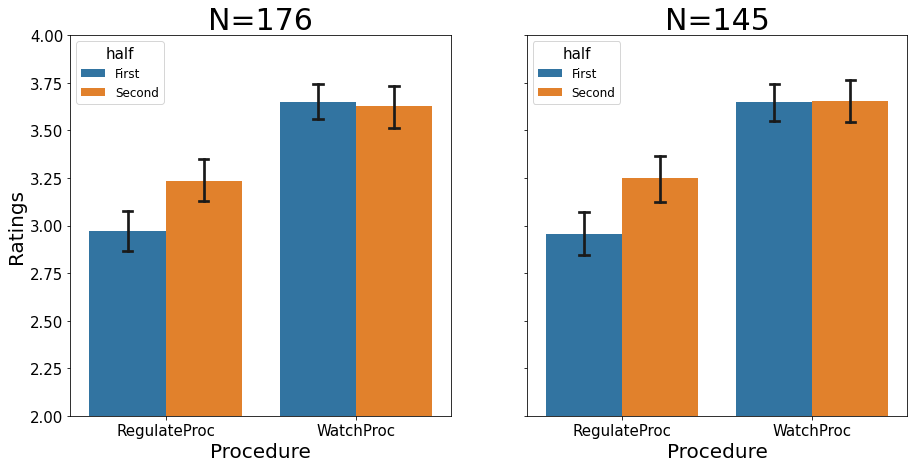

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7), sharey=True)

sns.barplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_full_group, capsize=.05, ax=axs[0], errcolor="0.1")

sns.barplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_preds_group,  capsize=.05, ax=axs[1],  errcolor="0.1")
axs[0].set_ylabel("Ratings", size=20)
axs[1].set_ylabel("")
axs[0].set_xlabel("Procedure", size=20)
axs[1].set_xlabel("Procedure", size=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)
axs[0].set_title("N=176", size=30)
axs[1].set_title("N=145", size=30)

plt.ylim([2, 4])
pass

In [10]:
# statistical differences between RegulateNegative ratings

import statsmodels.formula.api as smf
smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"], 
            missing="drop").fit()

print(f"Full Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"], 
            missing="drop").fit()

print(f"Prediction Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

Full Sample: t=7.069770070764379, p=1.5519062101482201e-12
Prediction Sample: t=7.48949290714425, p=6.914022037786904e-14


In [11]:
from scipy.stats import ttest_rel

a = ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"].half=="First"].Rating_RESP.to_numpy()
b = ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"].half=="Second"].Rating_RESP.to_numpy()
print(ttest_rel(a[b==b],b[b==b]))

a = ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"][ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"].half=="First"].Rating_RESP.to_numpy()
b = ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"][ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"].half=="Second"].Rating_RESP.to_numpy()
print(ttest_rel(a[b==b],b[b==b]))

Ttest_relResult(statistic=-7.066290138937705, pvalue=3.683800028503813e-11)
Ttest_relResult(statistic=-7.485559704215794, pvalue=6.67886187809191e-12)


In [12]:
# statistical differences between LookNegative ratings
import statsmodels.formula.api as smf
smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_full_group[ratings_data_full_group.Procedure=="WatchProc"], 
            missing="drop").fit()

print(f"Full Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_preds_group[ratings_data_preds_group.Procedure=="WatchProc"], 
            missing="drop").fit()

print(f"Prediction Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

Full Sample: t=-0.7489563847927099, p=0.4538834938950963
Prediction Sample: t=-0.009685955843607114, p=0.992271846215611
